In [30]:
import random
import statistics
from matplotlib import pyplot as plt

In [31]:
def roll(n, d, d20=1, verbosity=0):
    """
    Roll <n>d<d> dice, with explosions, plus d20 if d20=True.
    n: number of dice
    d: type of dice
    d20: n: also roll <n>d20, 0: only roll <n>d<d> dice.
    verbosity: 1: print each total roll, 2: print each die roll.
    """
    sum = 0
    i = 0
    while i < n:
        x = random.randint(1, d)
        if verbosity > 1: print(f"d{d}: {x}")
        if x < d: 
            i += 1
        sum += x
    i = 0
    while i < d20:
        x = random.randint(1, 20)
        if verbosity > 1: print(f"d20: {x}")
        if x < 20:
            i += 1
        sum += x
    if verbosity > 0: print(f"Total: {sum}", end="\n\n")
    return sum

In [32]:
powerlevels = {1:(1, 4), 2:(1, 6), 3:(1, 8), 4:(1, 10), 5:(2, 6), 6:(2, 8), 7:(2, 10), 8:(2, 8), 9:(3, 10), 10:(4, 8)}

Power level: 1
Mean:        14.386014
Median:      14.0
Over 100:    4


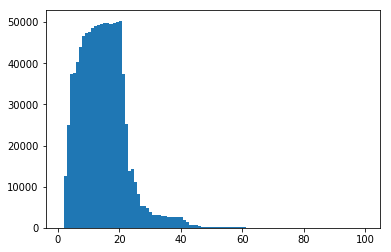

Power level: 2
Mean:        15.260244
Median:      15.0
Over 100:    3


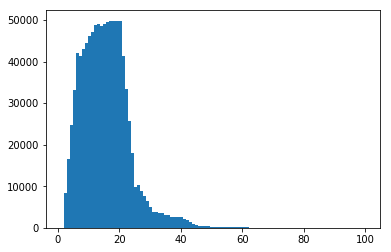

Power level: 3
Mean:        16.201337
Median:      16.0
Over 100:    2


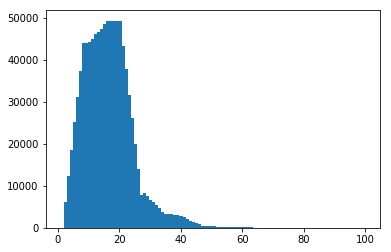

Power level: 4
Mean:        17.154399
Median:      16.0
Over 100:    2


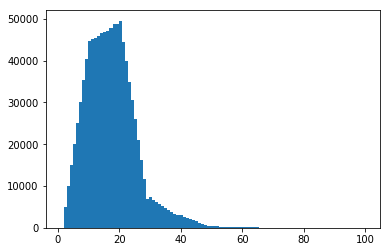

Power level: 5
Mean:        19.443876
Median:      19.0
Over 100:    1


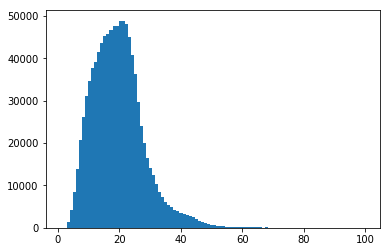

Power level: 6
Mean:        21.345099
Median:      21.0
Over 100:    6


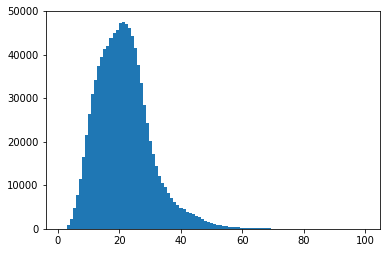

Power level: 7
Mean:        23.27146
Median:      22.0
Over 100:    11


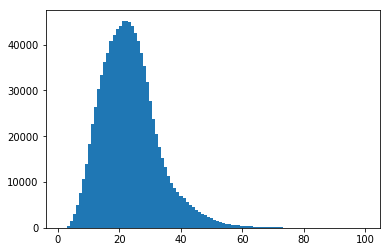

Power level: 8
Mean:        21.329926
Median:      21.0
Over 100:    1


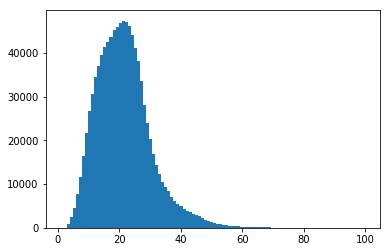

Power level: 9
Mean:        29.392682
Median:      28.0
Over 100:    24


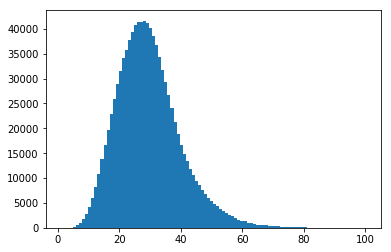

Power level: 10
Mean:        31.640596
Median:      31.0
Over 100:    33


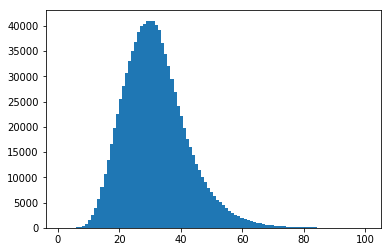

Median roll / powerlevel graph


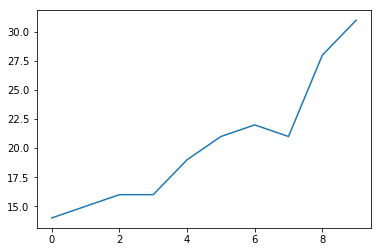

Mean roll / powerlevel graph


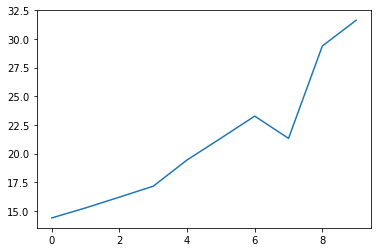

<Figure size 432x288 with 0 Axes>

In [39]:
rolls = {x:[] for x in powerlevels}
medians = []
means = []

for powerlevel in powerlevels:
    n, d = powerlevels[powerlevel]
    for i in range(10**6):
        rolls[powerlevel].append(roll(n,d))
    
    print("Power level:", powerlevel)
    mean = statistics.mean(rolls[powerlevel])
    means.append(mean)
    print("Mean:       ", mean)
    median = statistics.median(rolls[powerlevel])
    medians.append(median)
    print("Median:     ", median)
    print("Over 100:   ", len(list(filter(lambda x: x > 100, rolls[powerlevel]))))
    plt.hist(rolls[powerlevel], bins=100, range=(1, 100))
    plt.show()
    plt.clf()

print("Median roll / powerlevel graph")
plt.plot(medians)
plt.show()
plt.clf()
print("Mean roll / powerlevel graph")
plt.plot(means)
plt.show()
plt.clf()